In [28]:
! pip3 install -q kaggle

In [29]:
! kaggle datasets download -d arushchillar/disneyland-reviews
! unzip disneyland-reviews.zip

disneyland-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  disneyland-reviews.zip
replace DisneylandReviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("./DisneylandReviews.csv", encoding="ISO-8859-1")

In [110]:
corpus = df['Review_Text'].tolist()

["If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. ", "Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face,

Tokenización Bag Of Words

In [ ]:
! pip3 install transformers nltk

In [ ]:
import nltk
nltk.download('stopwords')

In [108]:
from transformers import AutoTokenizer
from nltk.corpus import stopwords
from collections import defaultdict

import string

stop_words = set(stopwords.words('english'))
tokenizer = AutoTokenizer.from_pretrained("gpt2")

word_freqs = defaultdict(int)

for text in corpus:
    text = text.translate(str.maketrans('', '', string.punctuation))
    filtered_text = [word.lower() for word in text.split(" ") if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_text)
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(filtered_text)
    new_words = [word for word, _ in words_with_offsets]
    for word in new_words:
        word = word.lstrip("Ġ")
        if word != "":
            word_freqs[word] += 1
        
print(sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15])

[('park', 44309), ('disney', 35973), ('rides', 34295), ('disneyland', 32622), ('time', 29219), ('day', 28145), ('get', 22963), ('go', 20091), ('one', 19081), ('ride', 17661), ('great', 16305), ('would', 14591), ('kids', 14135), ('food', 14129), ('place', 13367)]


In [106]:
alphabet = []

for word in word_freqs.keys():
    for letter in word:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet.sort()

print(alphabet)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
! pip install wordcloud matplotlib

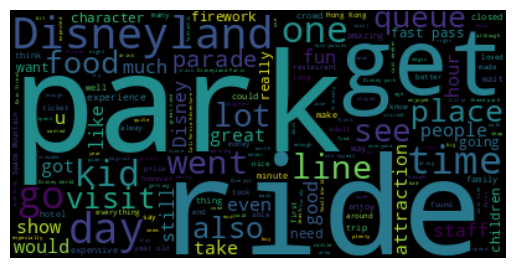

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "\n".join(corpus)

wordcloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
     

A fines de profundizar nuestro análisis, discretizaremos la variable de rating de la siguiente manera:
1. Excelente: Reseñas con puntaje 5
2. Bueno: Reseñas con puntaje 3 y 4
3. Malo: Reseñas con puntaje 1 y 2

In [120]:
dfExcelente = df[df['Rating'] == 5] 

In [118]:
dfBueno = df[(df['Rating'] == 4) | (df['Rating'] == 3)]

In [119]:
dfMalo = df[(df['Rating'] == 2) | (df['Rating'] == 1)]